### Simpson 11.2 Exercise: Building a CNN Image Classifier

Step 1: Load the MNIST dataset
First, we need to load the MNIST dataset. 

In [3]:
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


Step 2: Display the first five images and labels

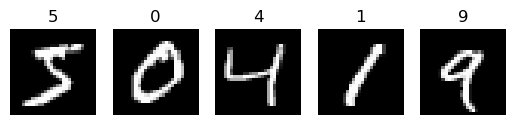

In [4]:
import matplotlib.pyplot as plt

# Displaying the first five images and labels
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(str(y_train[i]))
    plt.axis('off')

plt.show()


Step 3: Build and train a CNN classifier
Next, we'll build a CNN classifier using Keras. 

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Reshape the data for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize pixel values between 0 and 1 (my preferance)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128)


Epoch 1/10
469/469 [==============================] - 11s 22ms/step - loss: 0.2213 - accuracy: 0.9369
Epoch 2/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0632 - accuracy: 0.9804
Epoch 3/10
469/469 [==============================] - 11s 22ms/step - loss: 0.0448 - accuracy: 0.9864
Epoch 4/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0347 - accuracy: 0.9893
Epoch 5/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0276 - accuracy: 0.9916
Epoch 6/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0225 - accuracy: 0.9929
Epoch 7/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0185 - accuracy: 0.9942
Epoch 8/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0159 - accuracy: 0.9950
Epoch 9/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0129 - accuracy: 0.9958
Epoch 10/10
469/469 [==============================] - 11s 23ms/step - loss: 0.009

Step 4: We need to report the test accuracy
To report the test accuracy of your model, you can use the evaluate function in Keras.

In [7]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 [==============================] - 1s 3ms/step - loss: 0.0397 - accuracy: 0.9889
Test Accuracy: 0.9889000058174133


Step 5: Display a confusion matrix

313/313 [==============================] - 1s 3ms/step


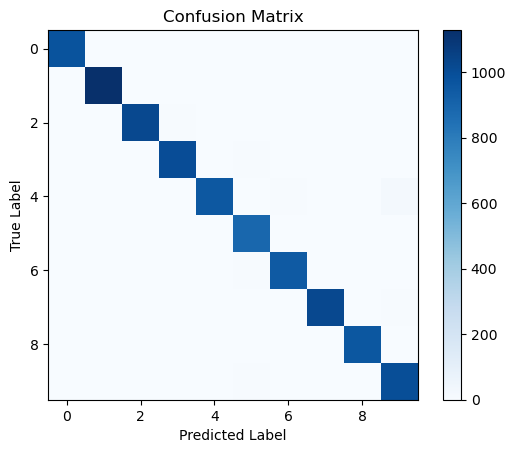

In [8]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Perform predictions on the test set
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### Summary

After being trained for 10 epochs utilizing the MNIST training dataset, considerable progress was demonstrated in minimizing errors throughout the training process.

The model exhibited a remarkable decrease in the training loss - a metric used to measure disparities between predicted and actual labels. Starting with an original value of 0.2213, the value progressively decreased to an impressively low value of 0.0098. This decrease indicates that over time, the model better learned how to make more accurate predictions – ultimately approaching high precision.

As the number of epochs progressed, there was a noticeable improvement in the model's accuracy rate in recognizing and distinguishing between various handwritten digits from the MNIST dataset. The increase, which was substantial, signaled that the model had become increasingly proficient at identifying numerical symbols with precision. Its accuracy rate well over 99%, serves as a testament to its reliability in accurately classifying each digit.
